### 사전준비

In [36]:
# 기본 패키지 import
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# 한글 설정/차트 마이너스 깨짐현상 해결 / seaborn으로 화면설정
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

In [38]:
# 머신러닝 패키지 import
import statsmodels.api as sm
import sklearn as sk

### 특성공학/규제

#### 데이터 준비

In [39]:
df= pd.read_csv('https://bit.ly/perch_csv')
df.tail()

length   height   width
51    42.0    12.80    6.87
52    43.0    11.93    7.28
53    43.0    12.51    7.42
54    43.5    12.60    8.14
55    44.0    12.49    7.60

In [40]:
perch_full = df.to_numpy()
perch_full

array([[ 8.4 ,  2.11,  1.41],
       [13.7 ,  3.53,  2.  ],
       [15.  ,  3.82,  2.43],
       [16.2 ,  4.59,  2.63],
       [17.4 ,  4.59,  2.94],
       [18.  ,  5.22,  3.32],
       [18.7 ,  5.2 ,  3.12],
       [19.  ,  5.64,  3.05],
       [19.6 ,  5.14,  3.04],
       [20.  ,  5.08,  2.77],
       [21.  ,  5.69,  3.56],
       [21.  ,  5.92,  3.31],
       [21.  ,  5.69,  3.67],
       [21.3 ,  6.38,  3.53],
       [22.  ,  6.11,  3.41],
       [22.  ,  5.64,  3.52],
       [22.  ,  6.11,  3.52],
       [22.  ,  5.88,  3.52],
       [22.  ,  5.52,  4.  ],
       [22.5 ,  5.86,  3.62],
       [22.5 ,  6.79,  3.62],
       [22.7 ,  5.95,  3.63],
       [23.  ,  5.22,  3.63],
       [23.5 ,  6.28,  3.72],
       [24.  ,  7.29,  3.72],
       [24.  ,  6.38,  3.82],
       [24.6 ,  6.73,  4.17],
       [25.  ,  6.44,  3.68],
       [25.6 ,  6.56,  4.24],
       [26.5 ,  7.17,  4.14],
       [27.3 ,  8.32,  5.14],
       [27.5 ,  7.17,  4.34],
       [27.5 ,  7.05,  4.34],
       [27

#### 농어데이터
농어의 길이, 무게, 두께 -> 무게예측 \
무게데이터

In [41]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [42]:
len(perch_full)

56

#### 훈련세트 / 데이터세트 나누기

In [43]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, 
                                                                      perch_weight,
                                                                      # test_size=0.3,
                                                                      random_state=42)

In [44]:
print(train_input.shape)
print(test_input.shape)

(42, 3)
(14, 3)


In [45]:
print(train_target.shape)
print(test_target.shape)

(42,)
(14,)


#### 사이킷런 변환기

특성이 하나 이상일 때 하나의 특성(새 회귀 방정식) 만드는 것

In [46]:
from sklearn.preprocessing import PolynomialFeatures

##### 예제

In [47]:
poly = PolynomialFeatures(include_bias=False) # 절편 1 없애기
poly.fit([[2,3]])
poly.transform([[2,3]])

array([[2., 3., 4., 6., 9.]])

In [48]:
poly.get_feature_names()

c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2']

##### 농어데이터 3개의 특징
트랜스포머로 특징을 분리

In [49]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input) # 입력되는 값이 몇개의 특징을 가지고 있는지 알려줌
train_poly = poly.transform(train_input)
train_poly.shape 

(42, 9)

In [50]:
poly.get_feature_names()

c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [51]:
test_poly = poly.transform(test_input)
test_poly.shape

(14, 9)

##### 다중 회귀모델 훈련

In [52]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X=train_poly, y=train_target)
lr.score(X=train_poly, y=train_target)

0.9903183436982124

In [53]:
lr.score(X=test_poly, y=test_target)

0.9714559911594145

### 예측하기 위한 데이터도 변환

In [54]:
pred_x =[[50.0, 13.5, 9.2]]
poly_p = PolynomialFeatures(include_bias=False)
poly_p.fit(pred_x) # 입력되는 값이 몇개의 특징을 가지고 있는지 알려줌
pred_poly = poly.transform(pred_x)
pred_poly.shape 

(1, 9)

In [55]:
pred_poly

array([[  50.  ,   13.5 ,    9.2 , 2500.  ,  675.  ,  460.  ,  182.25,
         124.2 ,   84.64]])

In [58]:
# 9개의 특성으로 예측해야 함
lr.predict(X=pred_poly)

array([1634.45893639])

##### 추가적인 내용

In [59]:
poly =PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
train_poly.shape

(42, 55)

In [60]:
poly.get_feature_names()

c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0',
 'x1',
 'x2',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x1^2',
 'x1 x2',
 'x2^2',
 'x0^3',
 'x0^2 x1',
 'x0^2 x2',
 'x0 x1^2',
 'x0 x1 x2',
 'x0 x2^2',
 'x1^3',
 'x1^2 x2',
 'x1 x2^2',
 'x2^3',
 'x0^4',
 'x0^3 x1',
 'x0^3 x2',
 'x0^2 x1^2',
 'x0^2 x1 x2',
 'x0^2 x2^2',
 'x0 x1^3',
 'x0 x1^2 x2',
 'x0 x1 x2^2',
 'x0 x2^3',
 'x1^4',
 'x1^3 x2',
 'x1^2 x2^2',
 'x1 x2^3',
 'x2^4',
 'x0^5',
 'x0^4 x1',
 'x0^4 x2',
 'x0^3 x1^2',
 'x0^3 x1 x2',
 'x0^3 x2^2',
 'x0^2 x1^3',
 'x0^2 x1^2 x2',
 'x0^2 x1 x2^2',
 'x0^2 x2^3',
 'x0 x1^4',
 'x0 x1^3 x2',
 'x0 x1^2 x2^2',
 'x0 x1 x2^3',
 'x0 x2^4',
 'x1^5',
 'x1^4 x2',
 'x1^3 x2^2',
 'x1^2 x2^3',
 'x1 x2^4',
 'x2^5']

In [61]:
lr.fit(train_poly, train_target)
lr.score(train_poly, train_target)

0.9999999999996176

In [62]:
lr.score(X=test_poly, y=test_target)

-144.40585108215134

#### 표준화 작업

입력값 - 평균 / 표준편차  일정한 단위가 되도록

In [63]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

StandardScaler()

In [64]:
train_poly.shape

(42, 55)

In [65]:
train_poly

array([[1.96000000e+01, 5.14000000e+00, 3.04000000e+00, ...,
        7.42244501e+02, 4.38992857e+02, 2.59637799e+02],
       [2.20000000e+01, 5.88000000e+00, 3.52000000e+00, ...,
        1.50793507e+03, 9.02709432e+02, 5.40397483e+02],
       [1.87000000e+01, 5.20000000e+00, 3.12000000e+00, ...,
        8.21240709e+02, 4.92744425e+02, 2.95646655e+02],
       ...,
       [2.56000000e+01, 6.56000000e+00, 4.24000000e+00, ...,
        3.28023719e+03, 2.12015331e+03, 1.37034299e+03],
       [4.20000000e+01, 1.28000000e+01, 6.87000000e+00, ...,
        5.31239245e+04, 2.85126063e+04, 1.53032504e+04],
       [3.45000000e+01, 1.02600000e+01, 6.39000000e+00, ...,
        2.74661189e+04, 1.71060916e+04, 1.06537939e+04]])

In [66]:
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [67]:
train_scaled

array([[-1.01339619, -1.01007487, -1.01952321, ..., -0.76449499,
        -0.75967179, -0.75143746],
       [-0.73842893, -0.75254307, -0.74466913, ..., -0.73198449,
        -0.72731765, -0.71950111],
       [-1.11650891, -0.98919391, -0.97371419, ..., -0.76114089,
        -0.75592147, -0.74734146],
       ...,
       [-0.32597805, -0.51589222, -0.33238802, ..., -0.65673421,
        -0.64237495, -0.62509499],
       [ 1.55296488,  1.65572732,  1.17358328, ...,  1.45958191,
         1.19906225,  0.95977016],
       [ 0.6936922 ,  0.7717668 ,  0.8987292 , ...,  0.3701756 ,
         0.40321427,  0.43089551]])

### 규제

훈련세트에 치중해서 과대적합이 되지않도록 해주는 작업 --> 릿지모델 / 라쏘모델

#### 릿지 회귀모델

In [68]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X=train_scaled, y=train_target)
ridge.score(X=train_scaled, y=train_target)

0.9896101671037343

In [69]:
ridge.score(X=test_scaled, y=test_target)

0.9790693977615383

#### 하이퍼파라미터 alpha 값 찾기

In [70]:
import matplotlib.pyplot as plt

train_score = []
test_score = []

In [71]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list: # 6번 반복
    ridge = Ridge(alpha=alpha) # 알파값을 변경하면서 생성 6번
    ridge.fit(X=train_scaled, y=train_target)

    train_score.append(ridge.score(X=train_scaled, y=train_target))
    test_score.append(ridge.score(X=test_scaled, y=test_target))

In [72]:
test_score

[0.9569388961546104,
 0.9800187936870526,
 0.9827976465386937,
 0.9790693977615383,
 0.9725329582461569,
 0.9627042641050291]

In [73]:
train_score

[0.9930455252088513,
 0.9917809981250514,
 0.9903815817570366,
 0.9896101671037343,
 0.988728468997471,
 0.9841843235774494]

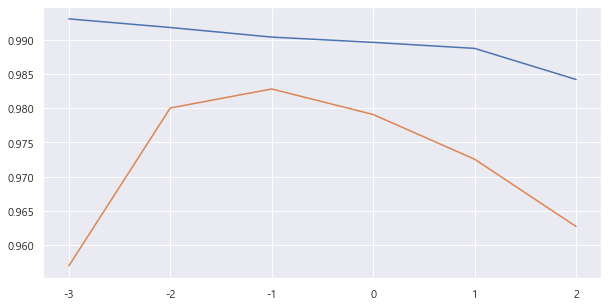

In [75]:
plt.figure(figsize=(10,5))
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()

In [77]:
# alpha 값은 -1 = 0.1 이 되면 가장 적당
ridge = Ridge(alpha=0.1) # 알파값을 변경하면서 생성 6번
ridge.fit(X=train_scaled, y=train_target)

print(ridge.score(X=train_scaled, y=train_target))
print(ridge.score(X=test_scaled, y=test_target))

0.9903815817570366
0.9827976465386937


In [78]:
print(ridge.coef_)
print(ridge.intercept_)

[ 27.61933479  -1.64022156 -19.73256036  30.0306195   16.99800255
  17.83247301   4.46928273   3.87258547  22.8351822   19.50417483
  17.75985317  14.53122144  13.34875736   7.57294011  19.2573194
   5.12766348  -2.05671393  10.62376405  41.72322888   5.90722851
  14.93389276  -0.4506018   19.86035413   1.27084276  -1.00708878
  19.69043816  -1.15817017  -3.57357468  11.96629206  13.68484378
  -8.41738209  -9.97919956   8.42421045  45.51544903  -6.23828569
  13.36080282 -17.64759601  28.23566212  -6.56619234 -25.89115813
  37.3785331   -0.39779345 -20.82275921 -23.80607786  39.96650626
   0.10569722 -20.49768851 -21.74712923  -4.12579289  35.39224119
  -5.59195    -25.3889504  -23.93962265  -1.89229971  39.44235556]
400.8333333333333


#### 라쏘 회귀모델 

In [80]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=10)
lasso.fit(X=train_scaled, y=train_target)

print(lasso.score(X=train_scaled, y=train_target))
print(lasso.score(X=test_scaled, y=test_target))

0.9888067471131867
0.9824470598706695


In [81]:
# from sklearn.linear_model import Lasso
# lasso = Lasso()
# lasso.fit(train_scaled, train_target)
# print(lasso.score(train_score, train_target))
